# Homework 6 - Running wrf.exe & Hurricane Katrina

In [1]:
### Import libraries
import numpy as np                  # For doing math
import matplotlib.pyplot as plt     # For plotting
import matplotlib.dates as mdates   # For formatting dates when plotting
import xarray as xr                 # For dealing with netCDF data
import cartopy.crs as ccrs          # For plotting maps
import cartopy.feature as cfeature  # For plotting maps
import pandas as pd                 # A quick way to deal with time stamps

print('testing')

testing


In [ ]:
### Read in data
sd = xr.open_dataset("/projects/jiko1138/ATOC_NWP/ICA_06/Katrina_sd/wrfout_d01_2005-08-28_00:00:00")
nd1 = xr.open_dataset("/projects/jiko1138/ATOC_NWP/ICA_06/Katrina_nd/wrfout_d01_2005-08-28_00:00:00")
nd2 = xr.open_dataset("/projects/jiko1138/ATOC_NWP/ICA_06/Katrina_nd/wrfout_d02_2005-08-28_00:00:00")

In [12]:
### Useful data and parameters for plotting
## Pull lat/lon from the dataset
lats1 = nd1['XLAT'].isel(Time=0)    # Note: we must index-select Time=0 because plots expect 2D data (lat-lon)
longs1 = nd1['XLONG'].isel(Time=0)
lats2 = nd2['XLAT'].isel(Time=0)
longs2 = nd2['XLONG'].isel(Time=0)

## Extract min/max values if you chose to bound the size of the map
min_lat1 = lats1.values.min()
max_lat1 = lats1.values.max()
min_lon1 = longs1.values.min()
max_lon1 = longs1.values.max()
MAP_BOUNDS1 = [min_lon1, max_lon1, min_lat1, max_lat1]
min_lat2 = lats2.values.min()
max_lat2 = lats2.values.max()
min_lon2 = longs2.values.min()
max_lon2 = longs2.values.max()
MAP_BOUNDS2 = [min_lon2, max_lon2, min_lat2, max_lat2]

## Calcualte wind speeds at 10m
sd_wsp = np.sqrt(sd['U10']**2 + sd['V10']**2)
nd1_wsp = np.sqrt(nd1['U10']**2 + nd1['V10']**2)
nd2_wsp = np.sqrt(nd2['U10']**2 + nd2['V10']**2)

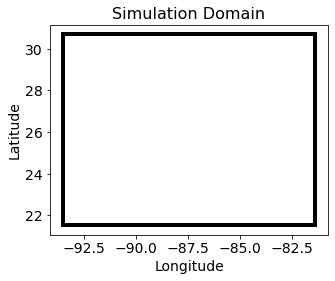

In [13]:
### Plot terrain
# Create figure and axes objects
fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.PlateCarree())

# Bound and fill in nice lines # comment this out if your cartopy isn't working
# ax.set_extent(MAP_BOUNDS1)
# ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.OCEAN)

# Draw bounding box for inner domain
ax.plot((min_lon2, min_lon2), (min_lat2, max_lat2), lw=4, color='k')
ax.plot((max_lon2, max_lon2), (min_lat2, max_lat2), lw=4, color='k')
ax.plot((min_lon2, max_lon2), (min_lat2, min_lat2), lw=4, color='k')
ax.plot((min_lon2, max_lon2), (max_lat2, max_lat2), lw=4, color='k')

# Add important info to the plot
ax.set_title("Simulation Domain", fontsize=16)
ax.xaxis.set_visible(True)    # Set xaxis visible because cartopy hides it by default
ax.yaxis.set_visible(True)
ax.tick_params(labelsize=14)
ax.set_xlabel("Longitude", fontsize=14)
ax.set_ylabel("Latitude", fontsize=14)

# Adjust figure height so the xlabel isn't cut off when saved
plt.gcf().subplots_adjust(bottom=0.15)

plt.savefig("domain.png")
plt.savefig("domain.pdf")

plt.show()

In [14]:
# Plot an interesting variable for this case

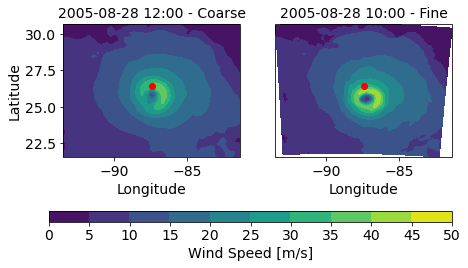

In [15]:
### Visualize variable of interest
## Set up the figure and axis, cartopy style
fig = plt.figure(figsize=(8,5))

# Left plot
ax1 = fig.add_subplot(1,2,1, projection=ccrs.PlateCarree())
# ax1.coastlines(linewidth=2)
ax1.set_extent(MAP_BOUNDS2)

# Right plot
ax2 = fig.add_subplot(1,2,2, projection=ccrs.PlateCarree())
# ax2.coastlines(linewidth=2)
ax2.set_extent(MAP_BOUNDS2)

## Set up colorbar values
ticks = np.linspace(0,50,11)

# Filled-contour plots
im1 = ax1.contourf(longs1, lats1, sd_wsp.isel(Time=-1), ticks)
im2 = ax2.contourf(longs2, lats2, nd2_wsp.isel(Time=-1), ticks)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.1, 0.15, 0.7, 0.03])
cbar = fig.colorbar(im1, cax=cbar_ax, ticks=ticks, orientation="horizontal")
cbar.set_label('Wind Speed [m/s]', fontsize=14)
cbar.ax.tick_params(labelsize=14)

ax1.xaxis.set_visible(True)
ax1.yaxis.set_visible(True)
ax1.tick_params(labelsize=14)
ax1.set_xlabel("Longitude", fontsize=14)
ax1.set_ylabel("Latitude", fontsize=14)
ax1.set_title(pd.to_datetime(sd_wsp['XTIME'].values[-1]).strftime('%Y-%m-%d %H:%M') + " - Coarse", fontsize=14)

ax2.xaxis.set_visible(True)
# ax2.yaxis.set_visible(True)
ax2.tick_params(labelsize=14)
ax2.set_xlabel("Longitude", fontsize=14)
# ax2.set_ylabel("Latitude", fontsize=14)
ax2.set_title(pd.to_datetime(nd2_wsp['XTIME'].values[-1]).strftime('%Y-%m-%d %H:%M') + " - Fine", fontsize=14)

ax1.scatter([-87.442085], [26.4], color='r')
ax2.scatter([-87.442085], [26.4], color='r')

plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig("contours.png")
plt.savefig("contours.pdf")

plt.show()

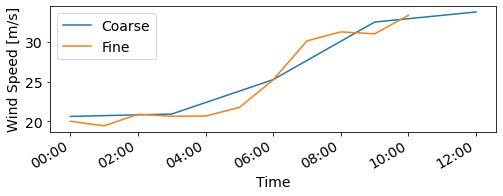

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8,3))

ax.plot(sd['XTIME'], sd_wsp.isel(west_east=53, south_north=39), label='Coarse')
ax.plot(nd2['XTIME'], nd2_wsp.isel(west_east=58, south_north=52), label='Fine')
ax.legend(fontsize=14)

ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Wind Speed [m/s]", fontsize=14)
ax.tick_params(labelsize=14)

# Format the x-axis labels nicely
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig("timeseries.pdf")

plt.show()